งานเดียว ให้นักเรียนใช้ dataset dog cat ทำทุกคน
โดย export จาก roboflow เลือก YOLOv8 คลิก show download code แล้วคัดลอกมาใส่ใน colab <br>
เมื่อทำเสร็จแล้ว ให้สั่ง print ไฟล์ colab เป็น pdf แล้วส่งใน Classroom

In [ ]:
# นำเข้าไลบรารีจาก google.colab เพื่อทำการ Mount Google Drive
from google.colab import drive

# Mount Google Drive ไปยังไดเรกทอรี /content/drive/
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# นำเข้าไลบรารี os เพื่อใช้งานฟังก์ชันเกี่ยวกับระบบปฏิบัติการ
import os

# ใช้ os.getcwd() เพื่อดึงตำแหน่งปัจจุบันของไดเรกทอรี
HOME = os.getcwd()

# แสดงตำแหน่งปัจจุบันของไดเรกทอรี
print(HOME)


/content


In [ ]:
# ติดตั้งไลบรารี Ultralytics เวอร์ชัน 8.0.20 โดยใช้คำสั่ง pip
!pip install ultralytics==8.0.20

# นำเข้าไลบรารี display จาก IPython เพื่อให้สามารถใช้ฟังก์ชัน clear_output() ได้
from IPython import display

# ใช้ clear_output() เพื่อล้างผลลัพธ์ที่แสดงบนหน้าจอ
display.clear_output()

# นำเข้าไลบรารี ultralytics เพื่อทำการตรวจสอบการติดตั้ง
import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
# นำเข้าคลาส YOLO จากไลบรารี Ultralytics
from ultralytics import YOLO

# นำเข้าฟังก์ชัน display และ Image จากไลบรารี IPython
from IPython.display import display, Image


In [ ]:
# สร้างไดเรกทอรี datasets ใน HOME
!mkdir {HOME}/datasets

# เปลี่ยนไดเรกทอรีทำงานเป็น datasets
%cd {HOME}/datasets

# ติดตั้งไลบรารี roboflow โดยใช้คำสั่ง pip
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="GdacNFTv5SOqFZUnlfOT")
project = rf.workspace("kittiwatkit").project("brain-tumor-3i2hp")
dataset = project.version(5).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing in

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to brain-tumor-5 in yolov8:: 100%|██████████| 8898/8898 [00:02<00:00, 3291.37it/s]


In [ ]:
import shutil

shutil.rmtree('/content/datasets')

In [ ]:
# เปลี่ยนไปทำงานในไดเรกทอรีหลัก (HOME)
%cd {HOME}

# ใช้คำสั่ง yolo เพื่อทำงานในโหมดการตรวจจับ (task=detect) และโหมดการฝึกอบรม (mode=train)
# โดยใช้โมเดล yolov8x.pt และไฟล์ data.yaml ที่อยู่ใน dataset
# ทำการฝึกอบรมเป็นจำนวน 50 รอบ (epochs=50), และกำหนดขนาดรูปภาพเป็น 220 (imgsz=220)
# เปิดตัวเลือกการแสดงผลกราฟ (plots=True)
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=50 plots=True imgsz=220  #patience=300

/content
100% 131M/131M [00:00<00:00, 202MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8x.yaml, data=/content/datasets/brain-tumor-5/data.yaml, epochs=50, patience=50, batch=16, imgsz=220, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False

In [ ]:
# เปลี่ยนไปทำงานในไดเรกทอรีหลัก (HOME)
%cd {HOME}

# ใช้คำสั่ง yolo เพื่อทำงานในโหมดการตรวจจับ (task=detect) และโหมดการทดสอบ (mode=val)
# โดยใช้โมเดล best.pt ที่อยู่ในไดเรกทอรี runs/detect/train/weights
# และใช้ไฟล์ data.yaml ที่อยู่ใน dataset
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2024-02-06 12:32:01.717042: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 12:32:01.721440: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 12:32:01.723365: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-06 12:32:03.146135: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68149569 parameters, 0 gradients, 257.5 GFLOPs
val: Scanning /content/datasets/brain-tumor-5/valid/labels.cach

/content


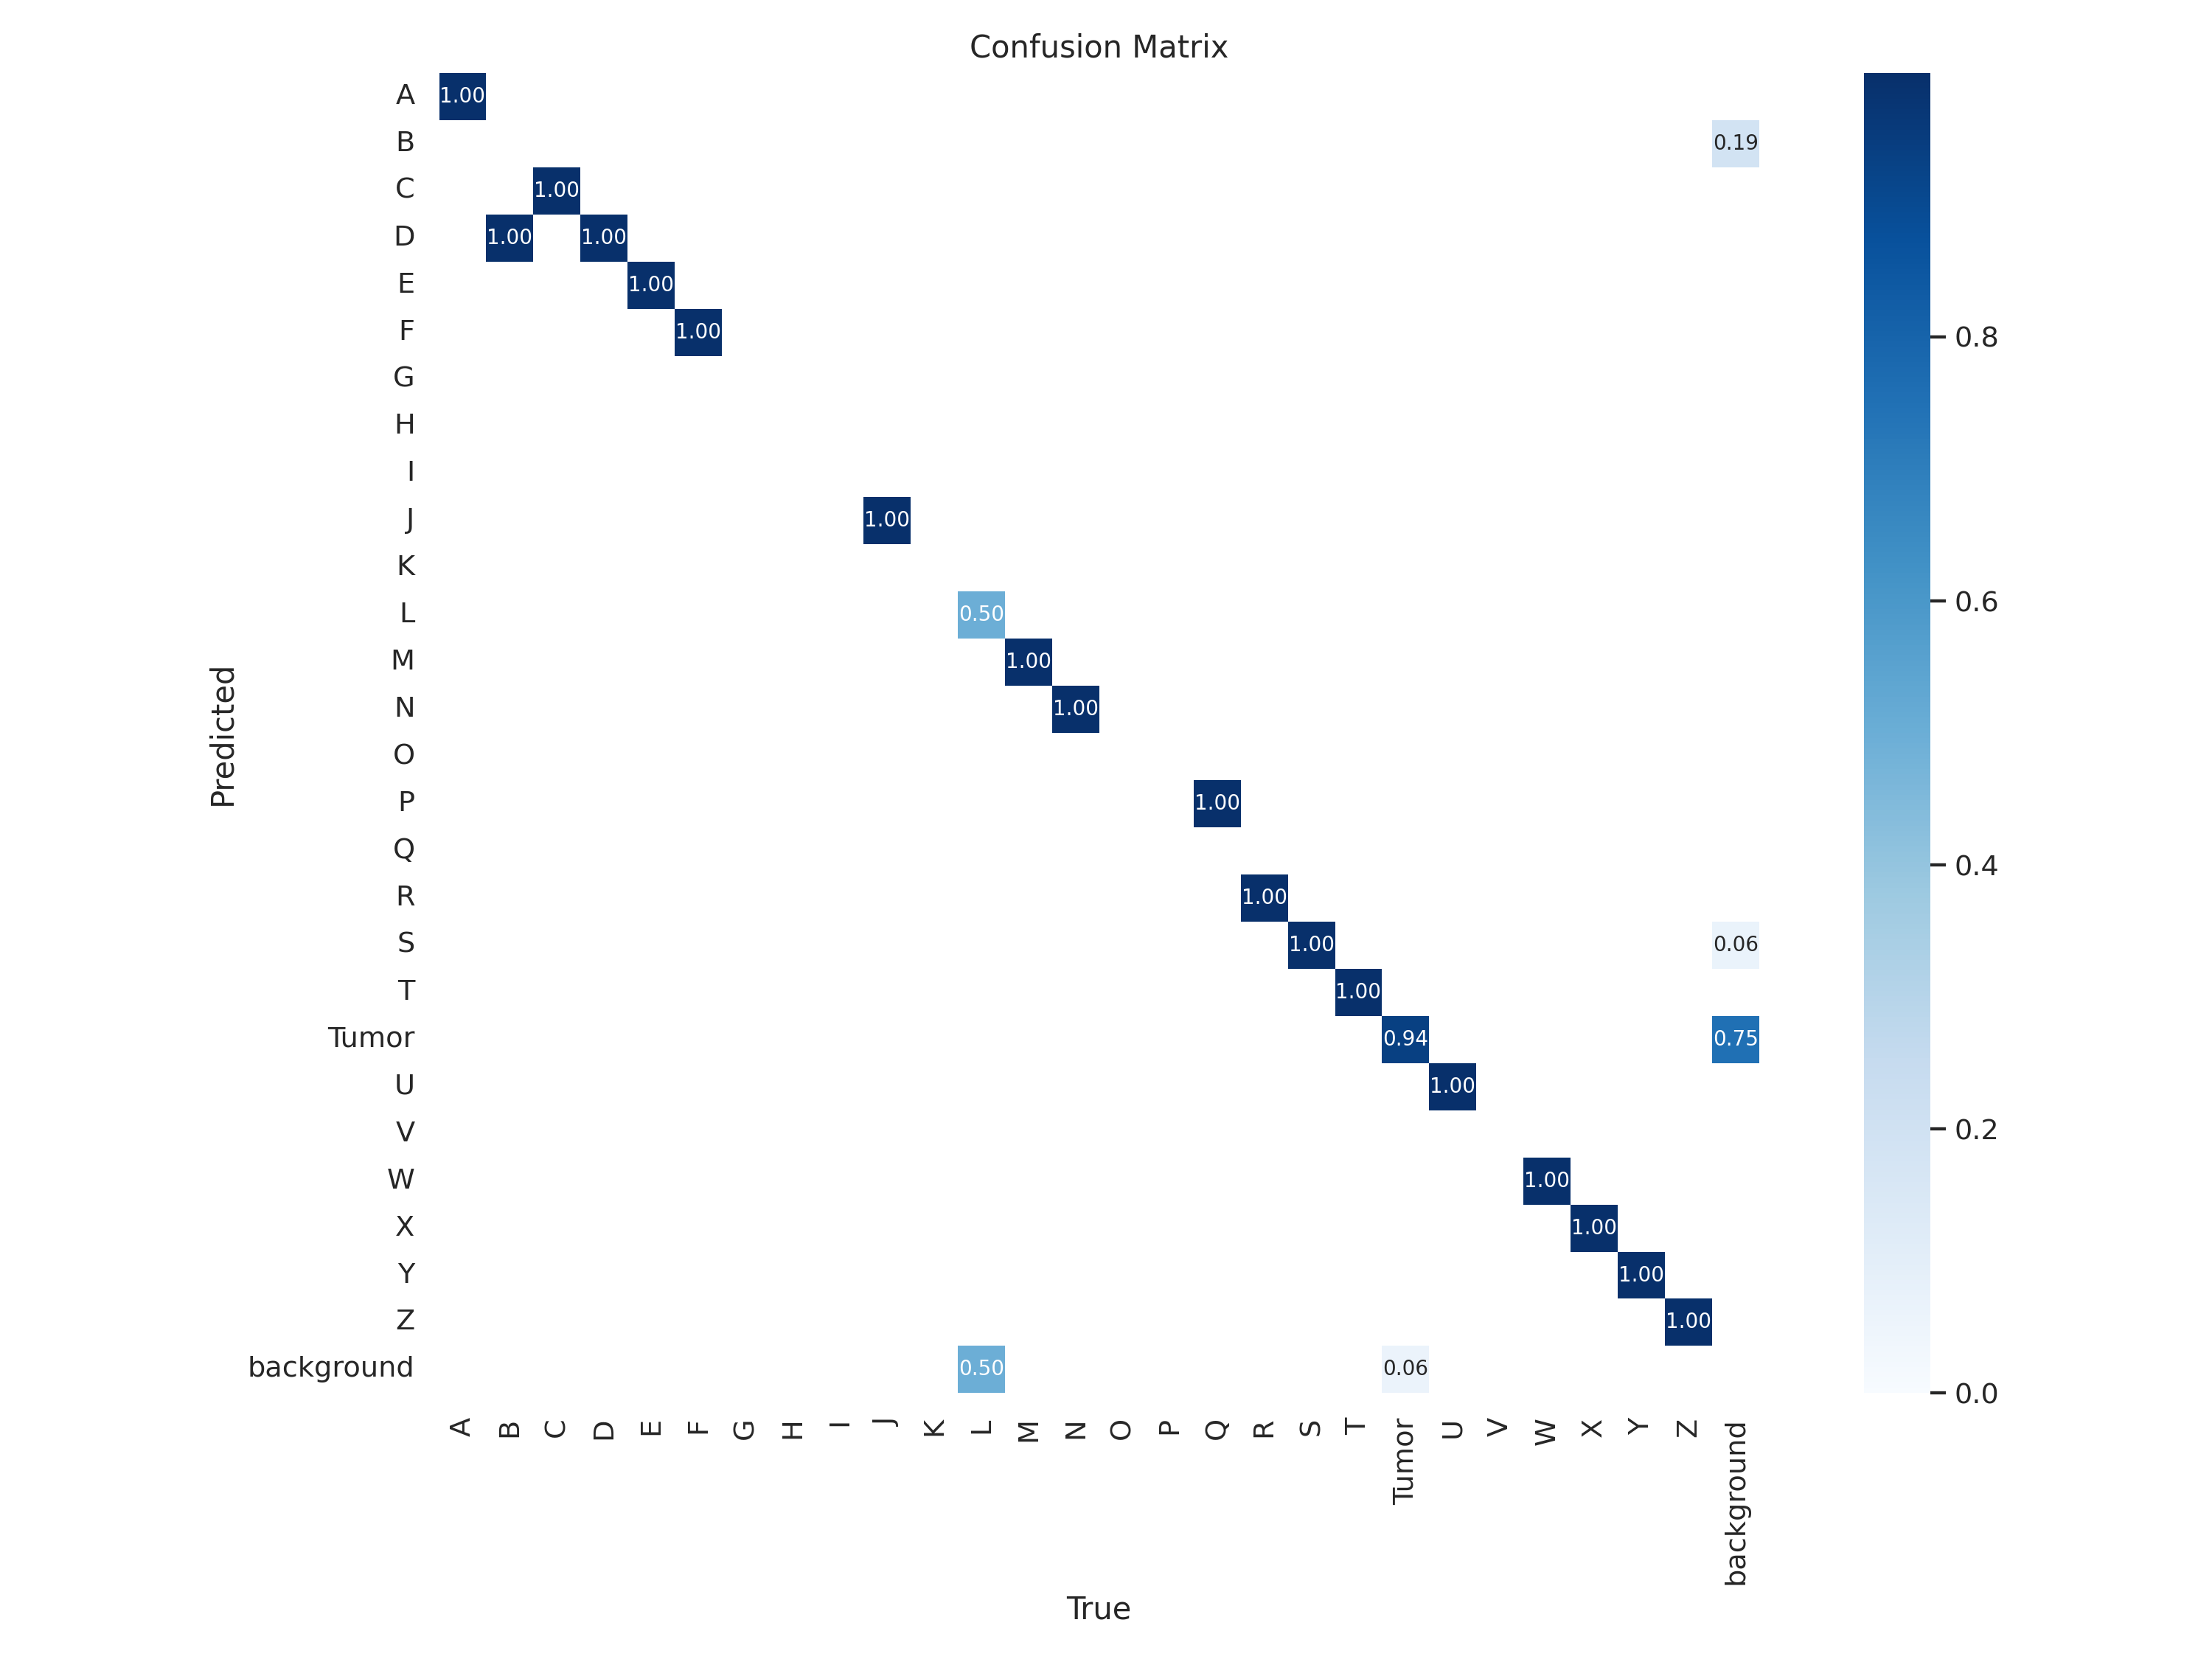

In [ ]:
# เปลี่ยนไปทำงานในไดเรกทอรีหลัก (HOME)
%cd {HOME}

# แสดงรูปภาพที่มีชื่อไฟล์ confusion_matrix.png ที่อยู่ในไดเรกทอรี runs/detect/train
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)


/content


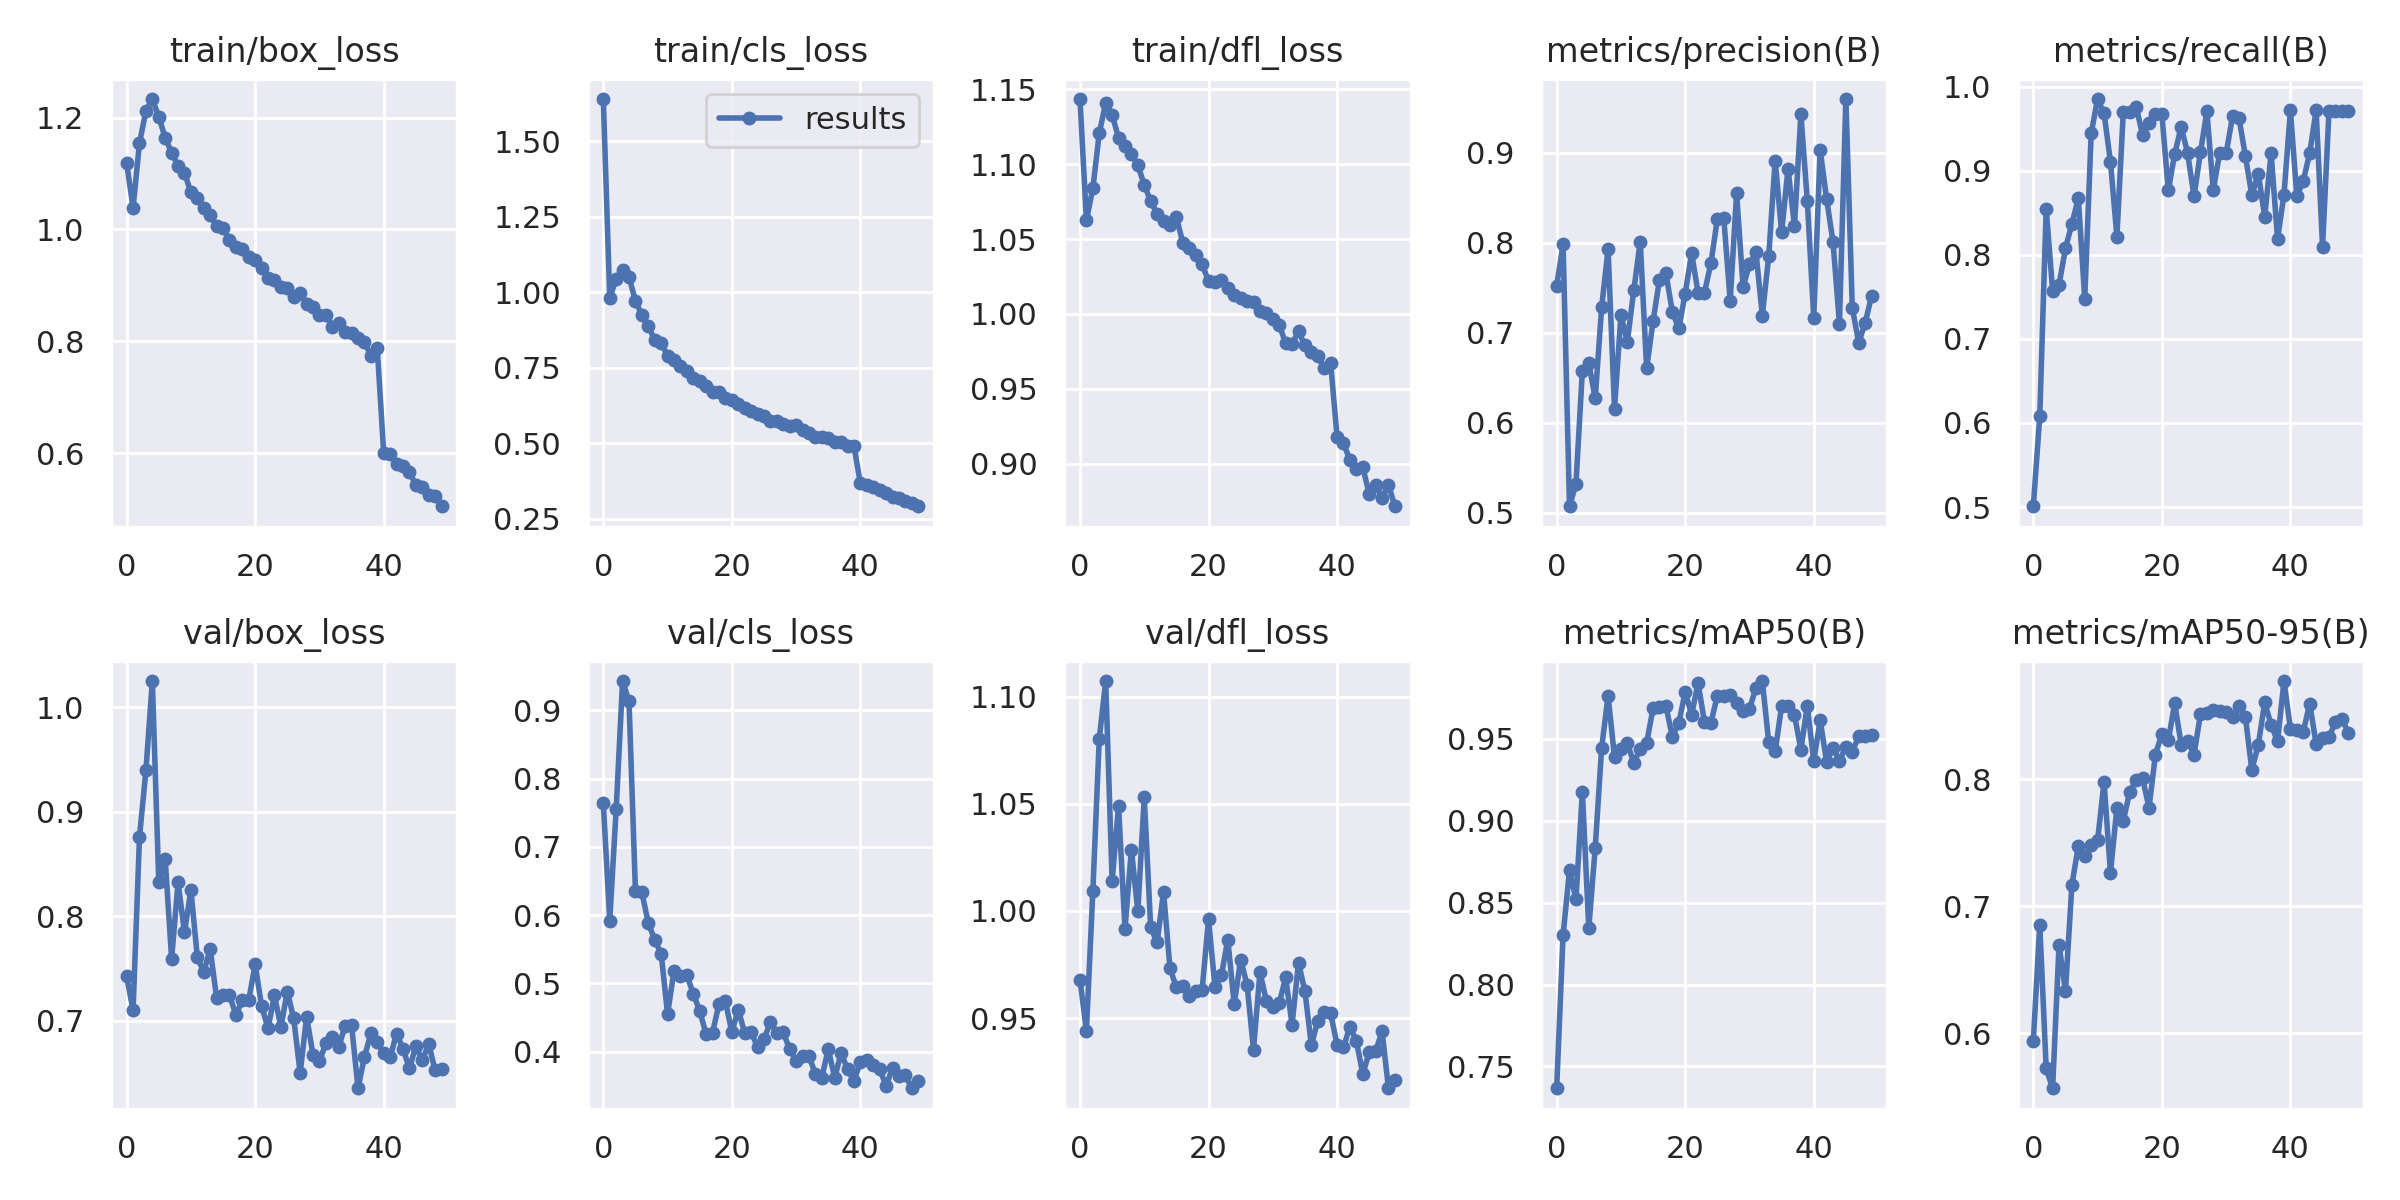

In [ ]:
# เปลี่ยนไปทำงานในไดเรกทอรีหลัก (HOME)
%cd {HOME}

# แสดงรูปภาพที่มีชื่อไฟล์ results.png ที่อยู่ในไดเรกทอรี runs/detect/train
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)


In [ ]:
# เปลี่ยนไปทำงานในไดเรกทอรีหลัก (HOME)
%cd {HOME}

# ใช้คำสั่ง yolo เพื่อทำงานในโหมดการตรวจจับ (task=detect) และโหมดการพยากรณ์ (mode=predict)
# โดยใช้โมเดล best.pt ที่อยู่ในไดเรกทอรี runs/detect/train/weights
# กำหนดค่า confidence threshold เป็น 0.25 (conf=0.25)
# และกำหนด source เป็นไดเรกทอรี images ที่อยู่ใน dataset/test และบันทึกผลลัพธ์ (save=True)
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
2024-02-06 12:32:24.029636: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 12:32:24.029685: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 12:32:24.030858: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-06 12:32:25.052558: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68149569 parameters, 0 gradients, 257.5 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/105 /content/

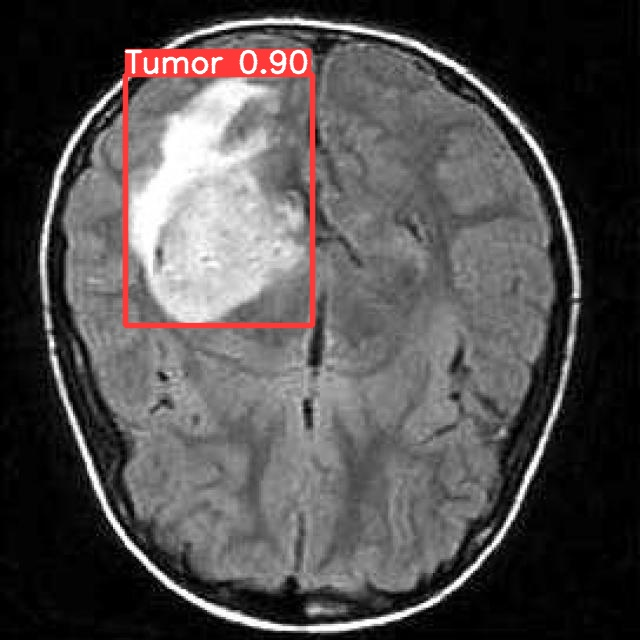

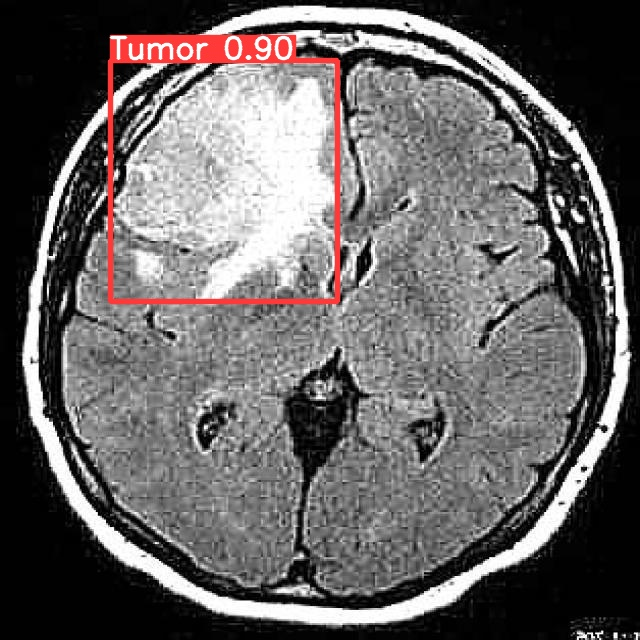

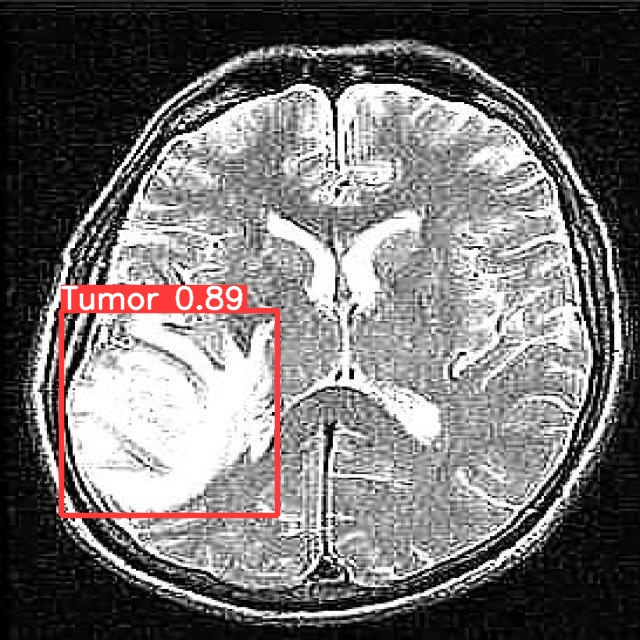

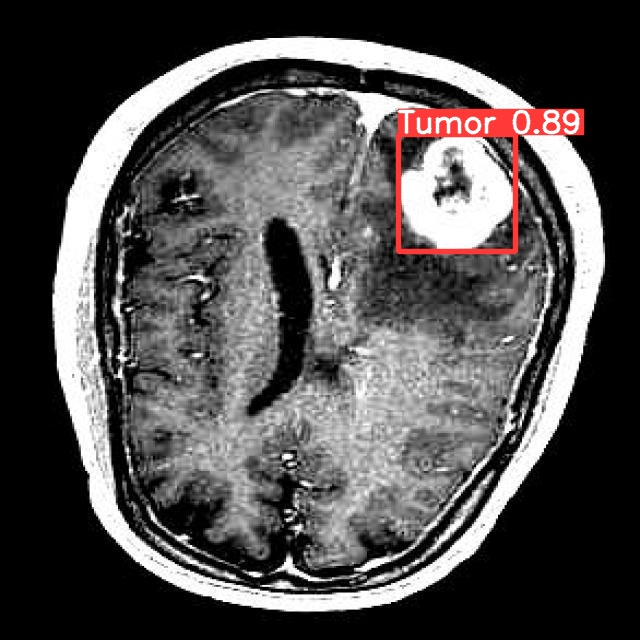

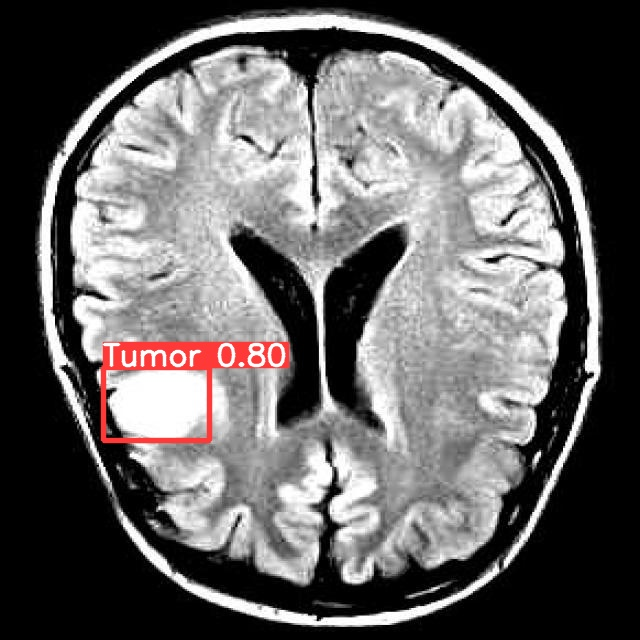

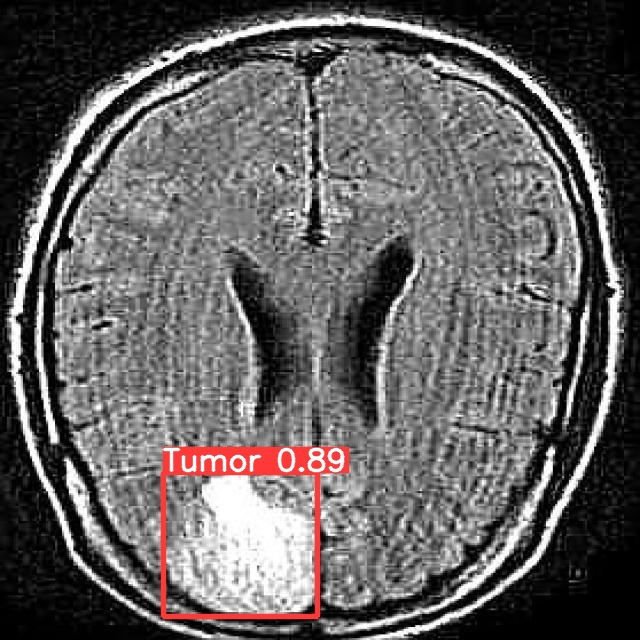

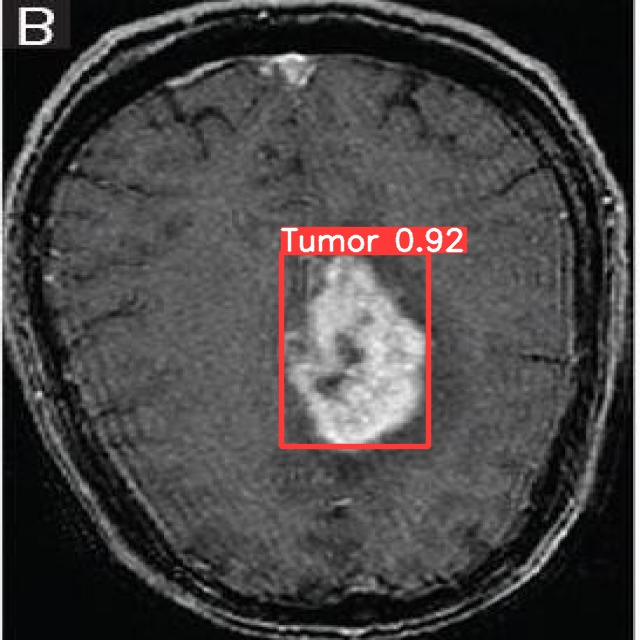

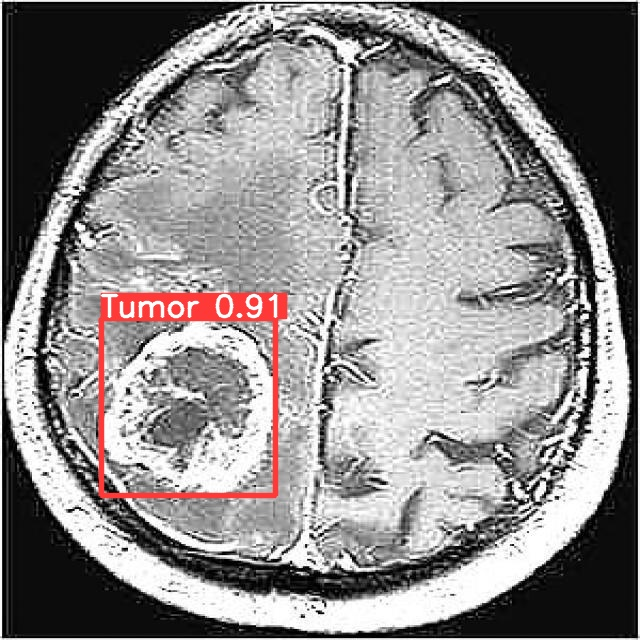

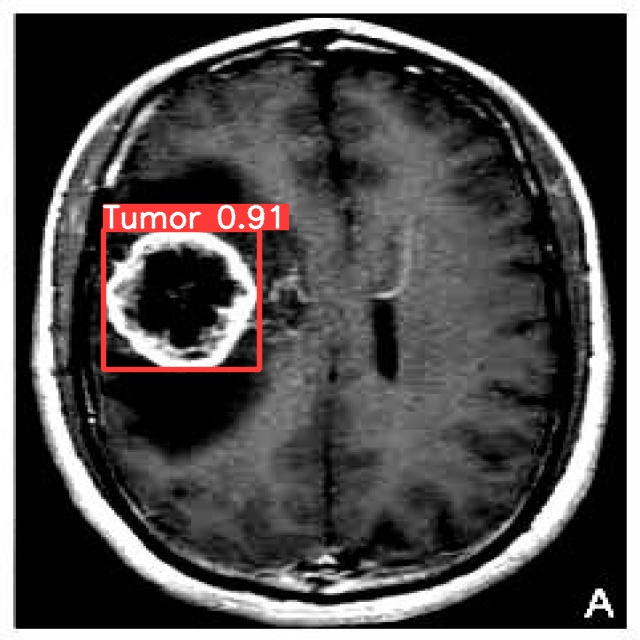

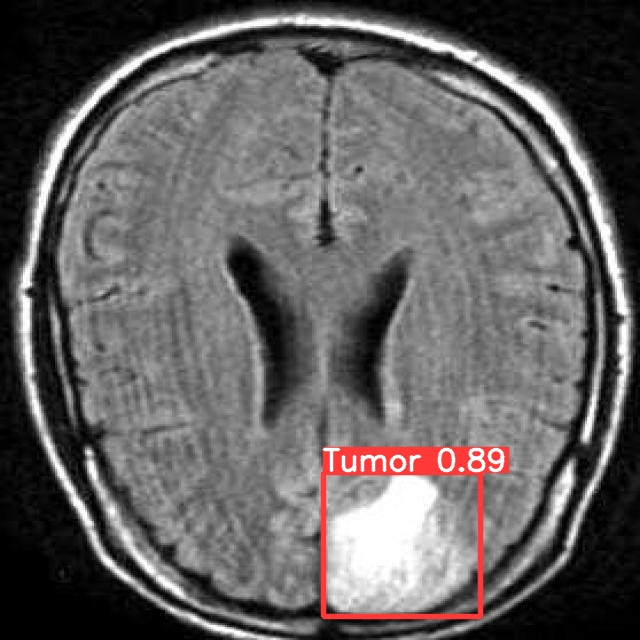

In [ ]:
# นำเข้าไลบรารี glob เพื่อให้สามารถใช้ฟังก์ชัน glob.glob() ได้
import glob

# นำเข้าฟังก์ชัน Image และ display จากไลบรารี IPython เพื่อแสดงรูปภาพ
from IPython.display import Image, display

# ใช้ glob.glob() เพื่อดึงรายชื่อไฟล์รูปภาพทั้งหมดที่อยู่ในไดเรกทอรี runs/detect/predict ที่มีนามสกุล .jpg
# และแสดงรูปภาพ 10 รูปแรก
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
    # แสดงรูปภาพโดยใช้ฟังก์ชัน display() และ Image()
    display(Image(filename=image_path, width=400))
    # พิมพ์ขึ้นบรรทัดใหม่
    print("\n")


In [ ]:
!zip -r /content/brain-tumor-letter-model.zip /content/runs/detect/train/weights

  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
